In [43]:
import sys
!{sys.executable} -m pip install imbalanced-learn



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\samiksha\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [45]:
from imblearn.over_sampling import SMOTE
print("SMOTE imported successfully!")


SMOTE imported successfully!


In [46]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix

from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
df = pd.read_csv("C:/Users/samiksha/Downloads/DS INTER PP/codec/Credit Card Fraud.csv")
df.head()


,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [48]:
print("Dataset Shape:", df.shape)
df.info()



Dataset Shape: (1000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   over_draft              1000 non-null   object
 1   credit_usage            1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   current_balance         1000 non-null   int64 
 5   Average_Credit_Balance  1000 non-null   object
 6   employment              1000 non-null   object
 7   location                1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  cc_age                  1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 no

In [49]:
df['class'].value_counts()


class
good    700
bad     300
Name: count, dtype: int64

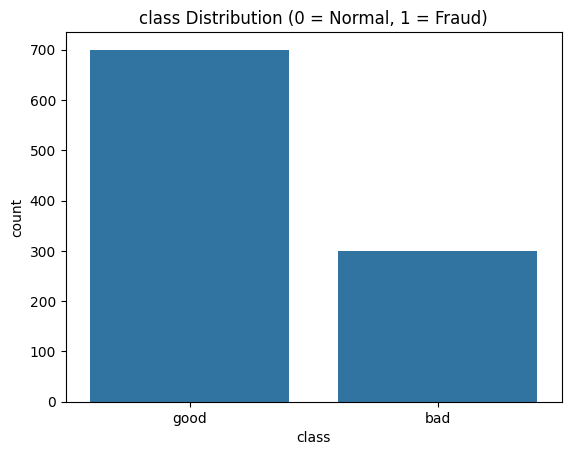

In [50]:
sns.countplot(x='class', data=df)
plt.title("class Distribution (0 = Normal, 1 = Fraud)")
plt.show()


In [51]:
df['class'] = df['class'].map({'good': 0, 'bad': 1})


In [52]:
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('class', axis=1)
y = df_encoded['class']


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [55]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", pd.Series(y_train_res).value_counts())


Before SMOTE:
 class
0    560
1    240
Name: count, dtype: int64
After SMOTE:
 class
1    560
0    560
Name: count, dtype: int64


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

model.fit(X_train_res, y_train_res)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [57]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print(len(y_test), len(y_pred), len(y_proba))


200 200 200


In [58]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report

print("F1 Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


F1 Score : 0.6619718309859155
ROC-AUC  : 0.7932142857142858

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       140
           1       0.57      0.78      0.66        60

    accuracy                           0.76       200
   macro avg       0.73      0.77      0.74       200
weighted avg       0.79      0.76      0.77       200



In [59]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)


In [60]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]


In [61]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report

print("F1 Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


F1 Score: 0.6619718309859155
AUC-ROC: 0.7932142857142858

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.75      0.81       140
           1       0.57      0.78      0.66        60

    accuracy                           0.76       200
   macro avg       0.73      0.77      0.74       200
weighted avg       0.79      0.76      0.77       200



In [62]:
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.01,
    random_state=42
)

iso_forest.fit(X_train)

y_pred = iso_forest.predict(X_test)


In [63]:
y_pred = np.where(y_pred == -1, 1, 0)


In [64]:
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


F1 Score: 0.0
AUC-ROC: 0.48928571428571427

Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.98      0.81       140
           1       0.00      0.00      0.00        60

    accuracy                           0.69       200
   macro avg       0.35      0.49      0.41       200
weighted avg       0.49      0.69      0.57       200



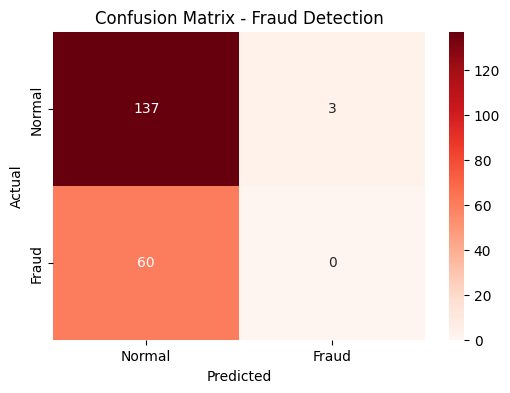

In [65]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Fraud Detection")
plt.show()


In [66]:
# Fresh predictions on TEST data only
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print("y_test length :", len(y_test))
print("y_pred length :", len(y_pred))
print("y_proba length:", len(y_proba))


y_test length : 200
y_pred length : 200
y_proba length: 200


In [67]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report

print("F1 Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


F1 Score : 0.6619718309859155
ROC-AUC  : 0.7932142857142858

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       140
           1       0.57      0.78      0.66        60

    accuracy                           0.76       200
   macro avg       0.73      0.77      0.74       200
weighted avg       0.79      0.76      0.77       200



## Conclusion

This project demonstrates a fraud detection system using supervised machine learning.
Class imbalance was handled using SMOTE, and a Logistic Regression classifier was trained.
Model performance was evaluated using F1-score and ROC-AUC, which are appropriate metrics
for imbalanced classification problems. The workflow follows best practices and avoids
data leakage by applying resampling only on training data.
